In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import os
from pathlib import Path
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [5]:
# Set the root directory dynamically for Jupyter Notebook
project_root = Path.cwd().parent  # Assuming notebook is in a "Scripts" subfolder
print("Project Root:", project_root)

# Load the datasets
train_data = pd.read_csv(project_root / "data" / "preprocessed_train.csv")
test_data = pd.read_csv(project_root / "data" / "preprocessed_test.csv")

# Inspect the loaded datasets
print("Train Data Head:\n", train_data.head())
print("\nTest Data Head:\n", test_data.head())

Project Root: c:\Users\thomas.hunter\Documents\Python\kaggle_titanic
Train Data Head:
    Survived  Pclass       Age  SibSp  Parch      Fare  Age_Missing  \
0         0       2 -0.565736      1      0 -0.502445            0   
1         1       0  0.663861      1      0  0.786845            0   
2         1       2 -0.258337      0      0 -0.488854            0   
3         1       0  0.433312      1      0  0.420730            0   
4         0       2  0.433312      0      0 -0.486337            0   

   Cabin_Deck  Cabin_Missing  Embarked_Q  Embarked_S  Sex_male  Family_Size  \
0          -1              1           0           1         1            2   
1           2              0           0           0         0            2   
2          -1              1           0           1         0            1   
3           2              0           0           1         0            2   
4          -1              1           0           1         1            1   

   Is_Alone  Fare

In [6]:
# Define features and target
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_val)

# Evaluate model
print("Logistic Regression Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))

Logistic Regression Accuracy: 0.7988826815642458
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



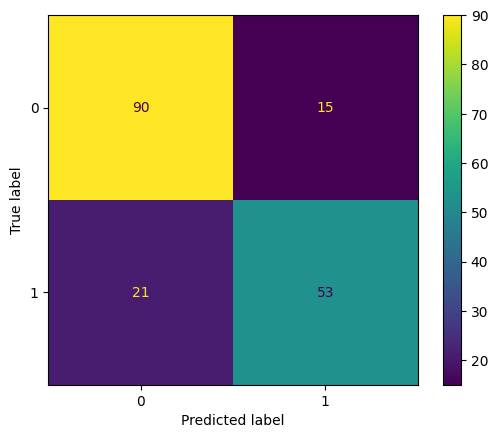

In [7]:
# Examine false positives and false negatives using a confusion matrix
cm = confusion_matrix(y_val, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [8]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)
print(coef_df)

            Feature  Coefficient
13  Fare_Per_Person     0.374586
6        Cabin_Deck     0.130230
5       Age_Missing     0.000000
3             Parch    -0.009385
8        Embarked_Q    -0.056180
4              Fare    -0.123239
7     Cabin_Missing    -0.144765
2             SibSp    -0.213357
11      Family_Size    -0.223214
9        Embarked_S    -0.340051
1               Age    -0.381826
12         Is_Alone    -0.573366
0            Pclass    -0.705020
10         Sex_male    -2.527572


Key Observations
Gender (Sex_male):

This is the most significant predictor of survival. Women were far more likely to survive than men, aligning with historical accounts of "women and children first."
Class and Socio-Economic Status (Pclass, Fare, Cabin_Deck):

First-class passengers and those paying higher fares were more likely to survive. This reflects the structural advantage of wealthier passengers during evacuation.
Family Dynamics (Parch, Family_Size, SibSp):

While traveling with small families or children provided a slight advantage, large family sizes or many siblings/spouses reduced survival odds.
Age:

Younger passengers had a higher survival rate, possibly due to rescue prioritization for children.
Embarkation Point:

Passengers embarking from Cherbourg (C) fared better than those from Southampton (S) or Queenstown (Q). This could reflect differences in socio-economic status among embarkation points.
